# Standard Linear Regression

#### Description:

This codebook covers how to use standard linear regression techniques to make a prediction.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [ ]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

### Check the shape and head of the dataframe
-------------------------

In [4]:
df_raw.shape

(506, 14)

In [5]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Visually inspect relationship between two variables
-------------------------

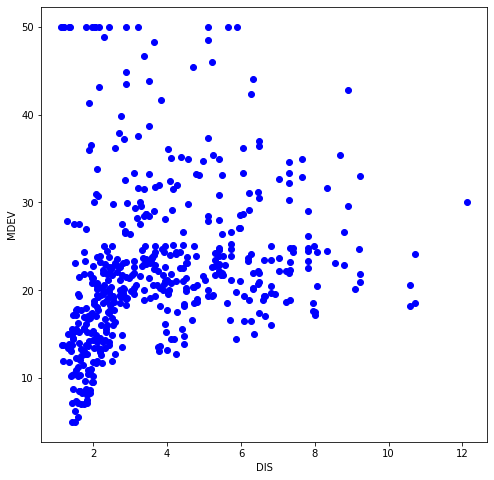

In [6]:
x_col = 'DIS'
y_col = 'MDEV'

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=df_raw[x_col], y=df_raw[y_col], color='b')

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)

plt.show()

### Separate features from the label
-------------------------

In [7]:
X = df_raw.drop('MDEV', axis=1)

In [8]:
y_true = df_raw[['MDEV']].values

### Fit linear regression model using a single feature
-------------------------

In [9]:
clf = LinearRegression()

clf.fit(X[['DIS']].values, y_true)

LinearRegression()

### Check predictions against actuals
-------------------------

In [10]:
df_pred = df_raw

In [11]:
y_pred = clf.predict(X[['DIS']].values)

df_pred['MDEV_pred'] = y_pred

In [12]:
df_pred[['MDEV', 'MDEV_pred']].head()

,MDEV,MDEV_pred
0,24.0,22.854786
1,21.6,23.812239
2,34.7,23.812239
3,33.4,25.007665
4,36.2,25.007665


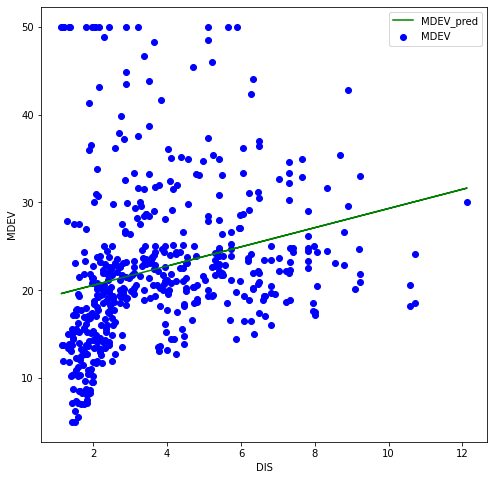

In [13]:
x_col = 'DIS'
y1_col = 'MDEV'
y2_col = 'MDEV_pred'

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X[['DIS']].values, y=y_true, label=y1_col, color='b')
ax.plot(X[['DIS']].values, y_pred, label=y2_col, color='g')

ax.set_xlabel(x_col)
ax.set_ylabel(y1_col)

ax.legend()
plt.show()

### Check coefficients
-------------------------

In [14]:
theta0, theta1 = clf.intercept_, clf.coef_[0]

theta0, theta1

(array([18.39008833]), array([1.09161302]))

### Check common error metrics

In [15]:
print('mean_squared_error', mean_squared_error(y_true, y_pred))
print('explained_variance_score', explained_variance_score(y_true, y_pred))
print('mean_absolute_error', mean_absolute_error(y_true, y_pred))
print('mean_squared_error', mean_squared_error(y_true, y_pred))
print('median_absolute_error', median_absolute_error(y_true, y_pred))
print('r2_score', r2_score(y_true, y_pred))

mean_squared_error 79.1463415860711
explained_variance_score 0.062464372121782685
mean_absolute_error 6.364831017913438
mean_squared_error 79.1463415860711
median_absolute_error 4.717830340822823
r2_score 0.062464372121782574


### Check residuals
-------------------------

In [16]:
residuals = y_pred - y_true

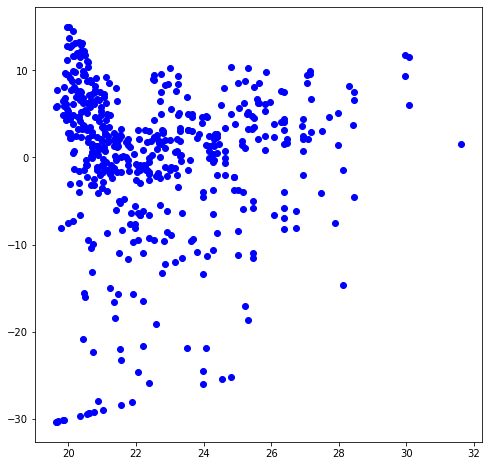

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=y_pred, y=residuals, color='b')

plt.show()

### Fit linear regression model using multiple features
-------------------------

In [18]:
clf = LinearRegression()

clf.fit(X, y_true)

LinearRegression()

### Check predictions against actuals
-------------------------

In [19]:
df_pred = df_raw

In [20]:
y_pred = clf.predict(X)

df_pred['MDEV_pred'] = y_pred

In [21]:
df_pred[['MDEV', 'MDEV_pred']].head()

,MDEV,MDEV_pred
0,24.0,30.008213
1,21.6,25.029861
2,34.7,30.570232
3,33.4,28.608141
4,36.2,27.942882


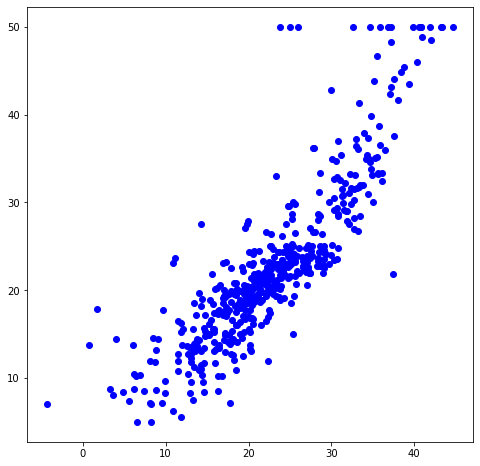

In [22]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=y_pred, y=y_true, color='b')

plt.show()

### Check feature coefficients
-------------------------

In [23]:
df_coef = pd.DataFrame(zip(X.columns, clf.coef_.T), columns=['feature', 'coefficient'])

In [24]:
df_coef

,feature,coefficient
0,CRIM,[-0.10717055656035511]
1,ZN,[0.04639521952979883]
2,INDUS,[0.020860239532176833]
3,CHAS,[2.688561399317925]
4,NOX,[-17.795758660309108]
5,RM,[3.8047524602580016]
6,AGE,[0.0007510617033214805]
7,DIS,[-1.4757587965198196]
8,RAD,[0.3056550383391007]
9,TAX,[-0.012329346305270331]


### Check common error metrics

In [25]:
print('mean_squared_error', mean_squared_error(y_true, y_pred))
print('explained_variance_score', explained_variance_score(y_true, y_pred))
print('mean_absolute_error', mean_absolute_error(y_true, y_pred))
print('mean_squared_error', mean_squared_error(y_true, y_pred))
print('median_absolute_error', median_absolute_error(y_true, y_pred))
print('r2_score', r2_score(y_true, y_pred))

mean_squared_error 21.897779217687496
explained_variance_score 0.7406077428649428
mean_absolute_error 3.2729446379969387
mean_squared_error 21.897779217687496
median_absolute_error 2.4559464328034686
r2_score 0.7406077428649428


### Check residuals
-------------------------

In [26]:
residuals = y_pred - y_true

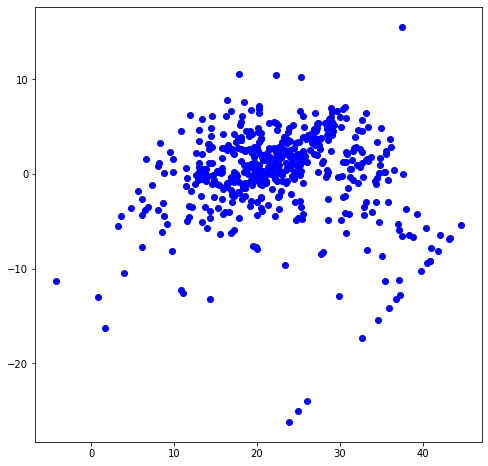

In [27]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=y_pred, y=residuals, color='b')

plt.show()